In [6]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from utils.svm_smo_full import SVM_SMO_FULL
from utils.svm_smo_simple import SVM_SMO_SIMPLE
from utils.svm_libsvm import SVM_LIBSVM
from utils.svm_cvx import SVM_CVX

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data_generator import generate_linearly_separable_data ,generate_non_linearly_separable_data

# Plotter file
from utils.plotter import plot_contour

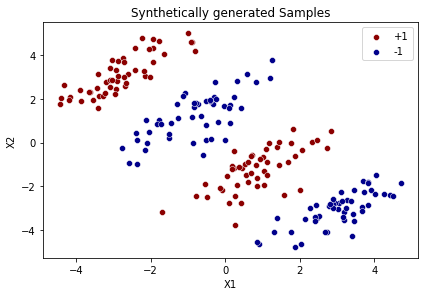

In [7]:
#Load Data
x1, y1, x2, y2 = generate_non_linearly_separable_data()
X_train = np.vstack((x1, x2))
Y_train = np.hstack((y1, y2))
plt.figure()
sns.scatterplot(x=x1[:, 0], y=x1[:, 1], label='+1', color='darkred')
sns.scatterplot(x=x2[:, 0], y=x2[:, 1], label='-1', color='darkblue')
plt.xlabel('X1'), plt.ylabel('X2'), plt.tight_layout(
), plt.title('Synthetically generated Samples')
plt.show()


In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [9]:
def plot_graph(cv_results):
        if cv_results is None:
            return

        sns.set_style("darkgrid")
        # plot for Guassian Kernel
        df = pd.DataFrame(cv_results)

        # Plot score Vs C  : linear kernel
        if('linear' in df['param_kernel'].values):

            plt.figure()
            dfl = df.loc[df['param_kernel'] == 'linear']
            ax = sns.lineplot(x=np.log10(
                dfl['param_C']), y=dfl['mean_test_score'], label='test score')
            # ax = sns.lineplot(x=np.log10(
            #     dfl['C']), y=dfl['train_score'], label='train score')
            ax.set_title('Linear Kernel : CVR Score vs C'), ax.set_xlabel(
                '$\log_{10}{C}$')
            # ax.set_ylim(0.8, 1)
            plt.show()

        # Plot C vs gamma
        if('rbf' in df['param_kernel'].values):
            plt.figure()
            ax = sns.heatmap(df.loc[df['param_kernel'] == 'rbf'].pivot('param_C', 'param_gamma', 'mean_test_score'),
                             annot=True, cmap='viridis',fmt='.4g')
            ax.set_title('Gaussian Kernel : Cross Validation Scores')
            ax.set_xlabel('Gamma'), ax.invert_yaxis()
            ax.set_ylabel('C (Regularization strength)')
            plt.show()

        # polynomial kernel :
        if('poly' in df['param_kernel'].values):
            plt.figure()
            ax = sns.heatmap(df.loc[df['param_kernel'] == 'poly'].pivot(
                'param_C', 'param_degree', 'mean_test_score'), annot=True, cmap='viridis', fmt='.4g')
            ax.set_title('Polynomial Kernel : Cross Validation Scores')
            ax.set_xlabel('Degree of kernel'), ax.invert_yaxis()
            ax.set_ylabel('C (Regularization strength)')
            plt.show()

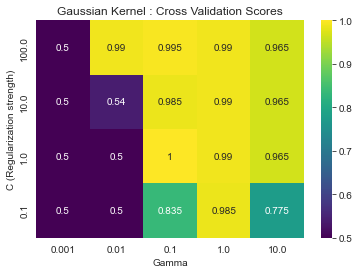

In [10]:
params = [{'kernel':['rbf'],'C':[1e-1,1e0,1e1,1e2],'gamma':[1e-3,1e-2,1e-1,1e0,1e1]}]
grid =GridSearchCV(SVC(),n_jobs=-1,param_grid=params)
grid.fit(X_train,Y_train)

plot_graph(grid.cv_results_)

In [11]:
grid.best_params_

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [43]:
model =SVM_SMO_FULL(kernel='gaussian',gamma=1,C=1)
model.fit(X_train,Y_train)
model.describe_solution()

Kernel: gaussian    C : 1.0
Intercept (b) =  -0.24551017848963444
Number of support vector is  67
To get the support vector use model.sv_x 
Model training time =  49.45750284194946


Text(0.5, 1.0, 'SVM_SMO_FULL : gaussian  C=1 gamma =1')

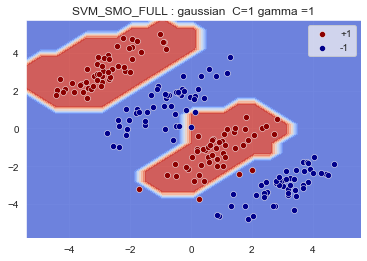

In [45]:
fig,ax= plt.subplots()
plot_contour(ax,X_train,Y_train,model)
plt.title(f"SVM_SMO_FULL : gaussian  C={1} gamma =1")

## SVM - SMO simple

In [58]:
model = SVM_SMO_FULL(kernel='gaussian',C=1,gamma=10)
model.fit(X_train,Y_train)
model.describe_solution()

Kernel: gaussian    C : 1.0
Intercept (b) =  -0.29682236326047345
Number of support vector is  55
To get the support vector use model.sv_x 
Model training time =  17.909867763519287


Text(0.5, 1.0, 'SVM_SMO_FULL : gaussian  C=1 gamma =10')

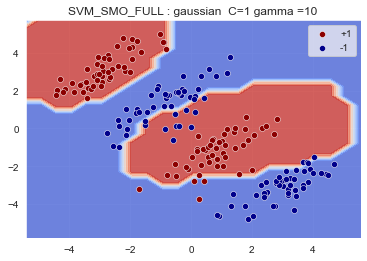

In [59]:
fig, ax = plt.subplots()
plot_contour(ax, X_train, Y_train, model)
plt.title(f"SVM_SMO_FULL : gaussian  C={1} gamma =10")
